In [1]:
import json
import numpy as np

from constants import NEURON_METADATA_PATH
from connectivity_comparisons import plot_connectivity_metrics
from morphology_plots import generate_morphology_plots
from synapse_comparisons import compare_closest_synapses, plot_synapse_distributions, plot_synapse_number_comparisons
from neuron_comparisons import NeuronComparator

# Please see https://caveclient.readthedocs.io/en/latest/index.html for installation and permissions from caveclient 
from caveclient import CAVEclient

%matplotlib inline
from meshparty import trimesh_io, trimesh_vtk
from meshparty import skeletonize, skeleton_io, skeleton
import cloudvolume

%load_ext autoreload
%autoreload 2

In [2]:
# Please see documentation for FANC_reconstruction to install fanc and use credentials
import fanc
# fanc.catmaid.save_catmaid_credentials("your credentials here")

In [3]:
# client = CAVEclient()
datastack_name = 'fanc_production_mar2021'
client=CAVEclient(datastack_name=datastack_name)
cv = cloudvolume.CloudVolume(client.info.get_datastack_info()['segmentation_source'], use_https=True)


In [4]:

# SET UP AND LOAD DATA
with open(NEURON_METADATA_PATH, 'r') as f:
    neuron_metadata = json.load(f)
neuron_metadata

[{'neuron_name': 'main_tibia_flexor_r',
  'pt': [55504, 89665, 2706],
  'class': 'L1_T1R',
  'skid': 735491,
  'catmaid_project_id': 60,
  'color': [0, 0, 0.7]},
 {'neuron_name': 'sternal_poserior_rotator_r',
  'pt': [63394, 114393, 2304],
  'class': 'A1_T1R',
  'skid': 710143,
  'catmaid_project_id': 60,
  'color': [0.7, 0, 0]},
 {'neuron_name': 'accessory_tibia_flexor_a_l',
  'pt': [15452, 91558, 2651],
  'class': 'L1_T1L',
  'skid': 254329,
  'catmaid_project_id': 13,
  'color': [0.0, 0.5, 0.0]},
 {'neuron_name': 'accessory_tibia_flexor_a_r',
  'pt': [61648, 90977, 2725],
  'class': 'L1_T1R',
  'skid': 395949,
  'catmaid_project_id': 13,
  'color': [0.0, 1.0, 0.0]}]

In [5]:
neuron_comparisons = [NeuronComparator(neuron_meta,cave_client=client,cloud_volume=cv,load_synapses=True) for neuron_meta in neuron_metadata]

# If problems arise with permissions, the synapses are located in the ./data/synapse_table directory and can be loaded below.
# First instantiate the NeuronComparator objects without loading the synapse tables by commenting the line above and uncommenting the line below
# neuron_comparisons = [NeuronComparator(neuron_meta,cave_client=client,cloud_volume=cv,load_synapses=False) for neuron_meta in neuron_metadata]

# MORPHOLOGY PLOTS FOR Figure 2A
# generate_morphology_plots(neuron_comparisons)
# see figures in neuron_plots, if problems arise

INFO  : Global CATMAID instance set. Caching is ON. (pymaid)
INFO  : Cached cleared. (pymaid)


CN details:   0%|          | 0/5640 [00:00<?, ?it/s]

INFO  : Data for 5640 of 5640 unique connector IDs retrieved (pymaid)
100%|██████████| 5640/5640 [00:00<00:00, 24177.21it/s]
INFO  : Global CATMAID instance set. Caching is ON. (pymaid)
INFO  : Cached cleared. (pymaid)


CN details:   0%|          | 0/1048 [00:00<?, ?it/s]

INFO  : Data for 1048 of 1048 unique connector IDs retrieved (pymaid)
100%|██████████| 1048/1048 [00:00<00:00, 24785.34it/s]
INFO  : Global CATMAID instance set. Caching is ON. (pymaid)
INFO  : Cached cleared. (pymaid)


CN details:   0%|          | 0/478 [00:00<?, ?it/s]

INFO  : Data for 478 of 478 unique connector IDs retrieved (pymaid)
100%|██████████| 478/478 [00:00<00:00, 24408.05it/s]
INFO  : Global CATMAID instance set. Caching is ON. (pymaid)
INFO  : Cached cleared. (pymaid)


CN details:   0%|          | 0/392 [00:00<?, ?it/s]

INFO  : Data for 392 of 392 unique connector IDs retrieved (pymaid)
100%|██████████| 392/392 [00:00<00:00, 19639.59it/s]


In [6]:
# generate_morphology_plots(neuron_comparisons)

In [8]:
# Saves the groundtruth and predicted synapses
# Run only if the above code runs without errors

# for n in neuron_comparisons:
#     n.ground_truth_synapses.to_csv('./data/synapse_tables/{}_groundtruth_synapses.csv'.format(n.name))
#     n.predicted_synapses.to_csv('./data/synapse_tables/{}_predicted_synapses.csv'.format(n.name))

# for n in neuron_comparisons:
#     n.ground_truth_synapses.to_pickle('./data/synapse_tables/{}_groundtruth_synapses.pkl'.format(n.name))
#     n.predicted_synapses.to_pickle('./data/synapse_tables/{}_predicted_synapses.pkl'.format(n.name))

In [14]:
# If issues arise with loading synapses due to catmaid permissions, synapse tables can simply be loaded here
for n in neuron_comparisons:
    n.load_synapse_coords()

In [15]:
n.ground_truth_synapses.empty

False

c:\Users\tony\Code\Azevedo_Lesser_Phelps_Mark_2023\synapse_comparisons.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(1, neuron.ground_truth_synapses.shape[0], c=neuron.color, s=200, alpha=1, edgecolors='k')
c:\Users\tony\Code\Azevedo_Lesser_Phelps_Mark_2023\synapse_comparisons.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(2, neuron.predicted_synapses.shape[0], c=neuron.color, s=200, alph

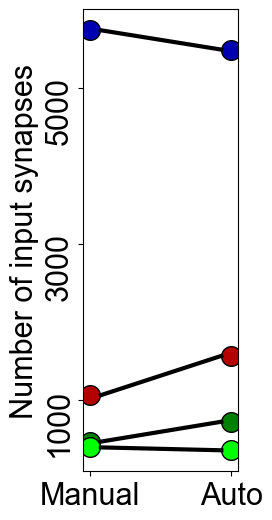

In [16]:


# SYNAPSE COMPARISONS FOR Figure 2E, S1D, and S1E
# Figure 2E
plot_synapse_number_comparisons(neuron_comparisons)
# Figure S1D


930426.0, p=3.3021966065255015e-07
0.12182052096359475, p=1.1855016583050285e-08
810104.5, p=0.23375725860817342
0.04458729883335805, p=0.1550640621104924
885448.0, p=0.005927947163801873
0.054103898552038426, p=0.04680223278317216


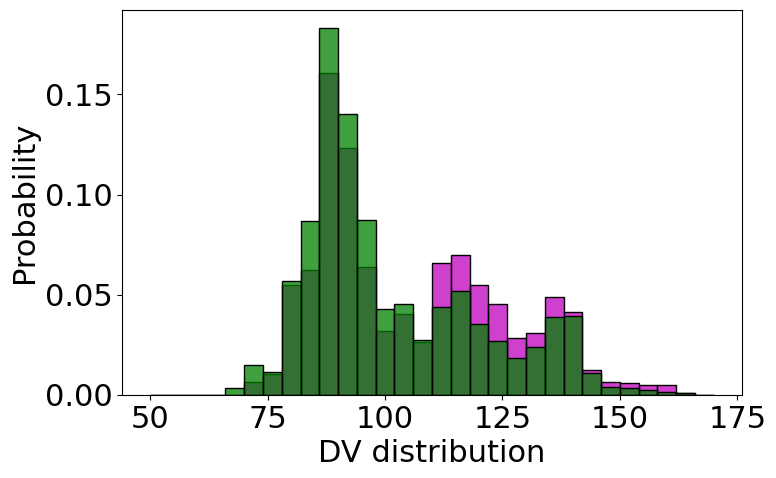

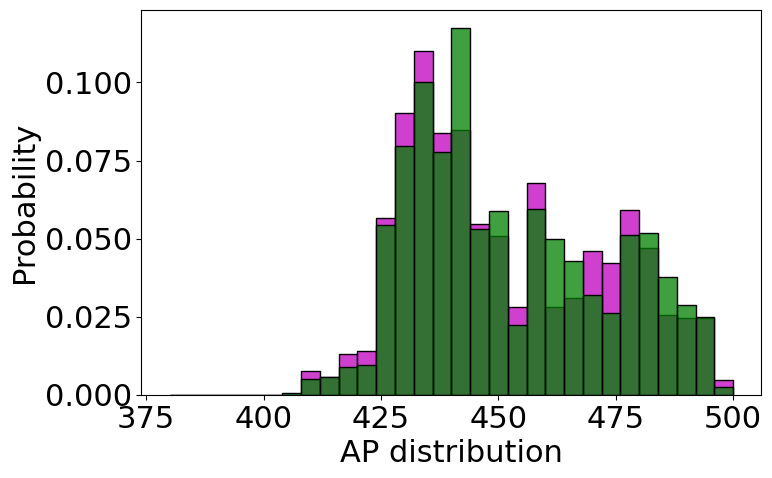

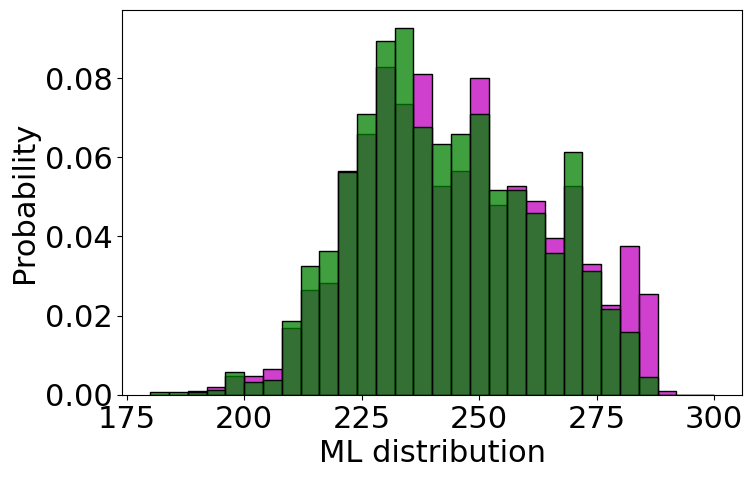

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# sternal_poserior_rotator_r
neuron_example = [neuron for neuron in neuron_comparisons if neuron.name == 'sternal_poserior_rotator_r'][0]
# plot_synapse_distributions(neuron_example)
# Figure S1E

ground_truth_synapses = neuron_example.get_synapse_array(neuron_example.ground_truth_synapses['post_pt_position_v4'])
predicted_synapses = neuron_example.get_synapse_array(neuron_example.predicted_synapses['post_pt_position'])

axis_lookup = {'DV': 2, 'AP': 1, 'ML': 0}
multiplier_lookup = {'DV': 45, 'AP': 4.3, 'ML': 4.3}
lims = {'DV': [50,170], 'AP': [380,500], 'ML': [180,300]}

for axis_name, dim in axis_lookup.items():
    plt.figure(figsize=[8, 5])

    sns.histplot(ground_truth_synapses[:, dim] * multiplier_lookup[axis_name]/1000,  
                stat='probability',  
                color='m', 
                binrange = lims[axis_name],
                binwidth=4)
    
    sns.histplot(predicted_synapses[:, dim]* multiplier_lookup[axis_name]/1000,
                color='g',
                stat='probability', 
                binrange = lims[axis_name],
                binwidth=4)
    
    plt.xlabel(f'{axis_name} distribution')
    # plt.xticks([])
    plt.savefig('./data/{}_distribution_histplot_ax.svg'.format(axis_name))

    res = scipy.stats.mannwhitneyu(ground_truth_synapses[:, dim] / 1000,predicted_synapses[:, dim] / 1000)
    print('{}, p={}'.format(res.statistic,res.pvalue))
    
    res = scipy.stats.kstest(ground_truth_synapses[:, dim] / 1000,predicted_synapses[:, dim] / 1000)
    print('{}, p={}'.format(res.statistic,res.pvalue))
    

In [25]:
# Mann whitney auc for dv distribution
930426/(len(ground_truth_synapses[:, dim])*len(predicted_synapses[:, dim]))

0.5585725340558233

c:\Users\tony\Code\Azevedo_Lesser_Phelps_Mark_2023\synapse_comparisons.py:79: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(1, np.mean(manual_min_distances), c=neuron.color, s=500, alpha=.75,
c:\Users\tony\Code\Azevedo_Lesser_Phelps_Mark_2023\synapse_comparisons.py:81: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(2, np.mean(predicted_min_distances), c=neuron.color, s=500, alpha=.75,


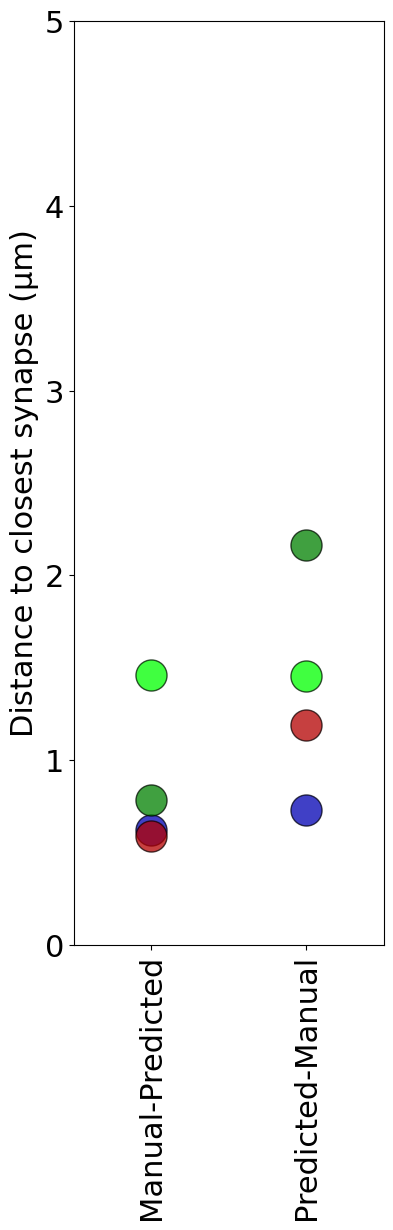

In [18]:
from synapse_comparisons import compare_closest_synapses
compare_closest_synapses(neuron_comparisons)


SYNAPSE_THRESHOLD 3
actual = 247, predicted = 262
recall done at 248 actual_counts
actual = 82, predicted = 106
precision done at 107 predicted counts
recall done at 83 actual_counts
actual = 39, predicted = 65
precision done at 66 predicted counts
recall done at 40 actual_counts
actual = 39, predicted = 30
precision done at 31 predicted counts
recall done at 40 actual_counts



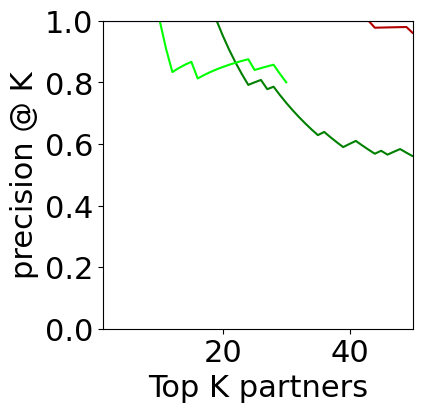

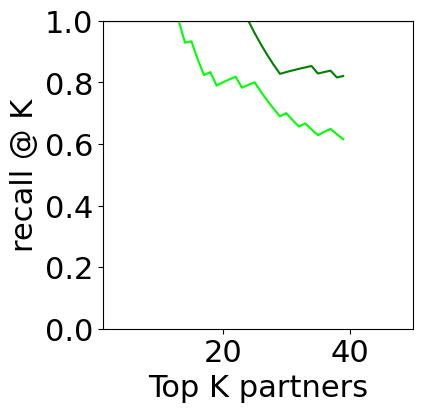

In [20]:
import connectivity_comparisons

# CONNECTIVITY COMPARISONS FOR FIGURE 2F and 2G
K_MEASURES = np.arange(1, 250, 1)
SYNAPSE_THRESHOLD = 3
for SYNAPSE_THRESHOLD in range(3,2,-1):
    print('SYNAPSE_THRESHOLD {}'.format(SYNAPSE_THRESHOLD))
    connectivity_comparisons.plot_connectivity_metrics(neuron_comparisons, K_MEASURES, SYNAPSE_THRESHOLD)
    print('')

if __name__ == '__main__':
    pass